In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [9]:
#training from data to find optimal weight vector
def perceptron_classification(training_X,training_y):
    mistake_count=0
    sz=training_X.shape[0]
    w=np.zeros(training_X.shape[1])  #inital guess,weight vector
    indices = list(range(sz))  # Create a list of indices
    random.shuffle(indices)  # Shuffle the indices

    for it in range(100):
        if not indices:
            break  # Stop if all indices have been used
        i = indices.pop()  # Get and remove the last index
        h=np.sign(np.dot(w,training_X[i,:]))
        if h!=training_y[i]:
            w+=np.dot(training_y[i],training_X[i])
            w=w/np.linalg.norm(w)
            mistake_count+=1
    return w,mistake_count

In [10]:
#Testing the data
def misclassification_count(testing_X,testing_y,trained_w):
    misClasscount=0
    y_pred=[]
    for i in range(len(testing_X)):
        x=testing_X[i]
        y=testing_y[i]
        h=np.sign(np.dot(trained_w,x))    
        y_pred.append(h)  
        if h!=y :
            misClasscount +=1
    return y_pred,misClasscount

In [11]:
# generate a binary classification dataset with 2 classes and 5 features
X,y=make_classification(n_samples=100, n_features=5, n_classes=2)
#make classes {-1,1} instead of {0,1}
y=2*y-1

#normalize the data set  of X with its own norm xi
for i in range(100):
    X[i]=X[i]/(np.linalg.norm(X[i,:])) #preprocessing the data

#split test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#call for training
weight_vector,mistakeCount=perceptron_classification(X_train,y_train)
#display results
print("Optimal Weight Vector:",weight_vector)
print("Mistake = ",mistakeCount)


#call for testing the data set
y_pred,misclassification_count=misclassification_count(X_test,y_test,weight_vector)
print("\nMisclassifications = ",misclassification_count)

#decision boundary
y_predicted=np.multiply(np.transpose(weight_vector),X_test)

Optimal Weight Vector: [-0.17434618  0.60544859 -0.28143923 -0.5770439  -0.4368612 ]
Mistake =  19

Misclassifications =  3


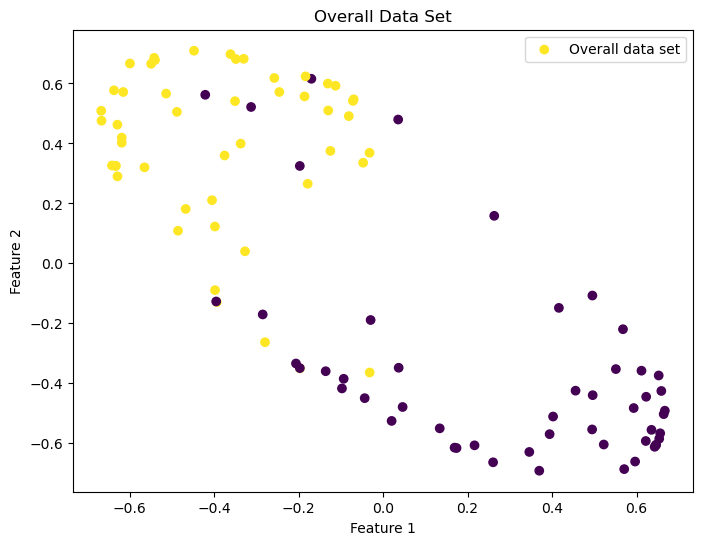

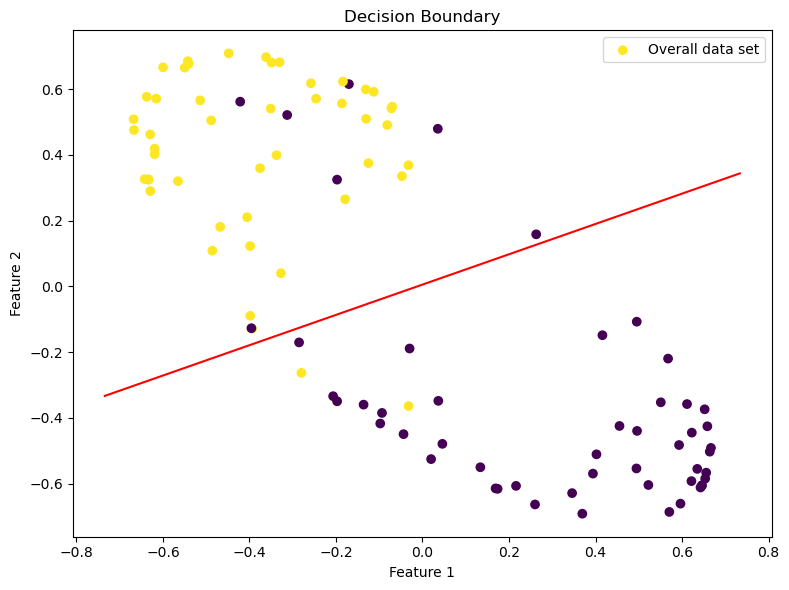

In [12]:
# Plot 1: Overall Data Set
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, label="Overall data set")
plt.title("Overall Data Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Plot 2: Decision Boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, label="Overall data set")
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x_range = np.linspace(xmin, xmax, 100)
y_range = np.linspace(ymin, ymax, 100)
Y_dec_boundary = weight_vector[0] * x_range + weight_vector[1] * y_range
plt.plot(x_range, Y_dec_boundary, color='red')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.85


Confusion Matrix:
[[11  0]
 [ 3  6]]


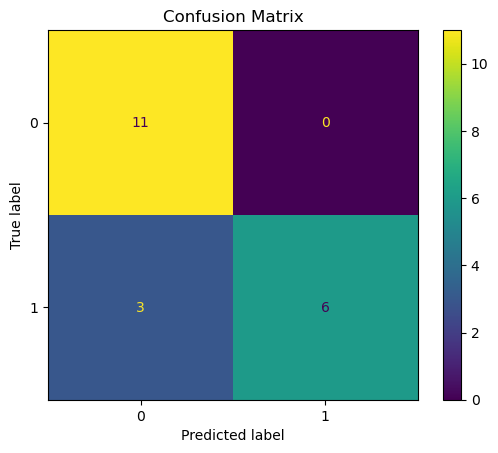

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix")
plt.show()